In [1]:
# This python file is the one that reads the data from master-covid.csv and population data that cleansed.
# This python file is the one that creates inights for the COVID confirmed cases and the BCG.

# read the master-covid file
# Import the Pandas library
import pandas as pd
import uuid


import pandas as pd
import numpy as np

from matplotlib import style

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# File to load
file_path = "data/stage_2_2-final/master-covid-v2-final.csv"
# print(file_path)

master_covid_df = pd.read_csv(file_path, low_memory=False)
master_covid_df.head()


unique_id         Country      State  \
0  1158ed31-9d4c-4f81-aa07-74a43e277f71  Mainland China      Anhui   
1  0248041d-2aa3-4b8a-8461-0437165dc6f0  Mainland China    Beijing   
2  155d9451-da4f-4917-af22-ab8dc73616f9  Mainland China  Chongqing   
3  f4d90440-bdd6-4801-913a-1a7087c1bbfc  Mainland China     Fujian   
4  4058f24d-300e-4896-909e-e409a3fcf865  Mainland China  Guangdong   

       Last Update  Confirmed  Deaths  Recovered  
0  1/22/2020 17:00        1.0     NaN        NaN  
1  1/22/2020 17:00       14.0     NaN        NaN  
2  1/22/2020 17:00        6.0     NaN        NaN  
3  1/22/2020 17:00        1.0     NaN        NaN  
4  1/22/2020 17:00       26.0     NaN        NaN

In [3]:
master_covid_df['Country'] = master_covid_df['Country'].replace({'China':'Mainland China'})
#master_covid_df['Country'] = master_covid_df['Country'].replace({'US':'Brazil'})
master_covid_df['Country'] = master_covid_df['Country'].replace({'France':'Colombia'})
#master_covid_df['Country'] = master_covid_df['Country'].replace({'Canada':'India'})
#master_covid_df['Country'] = master_covid_df['Country'].replace({'Columbia':'Colombia'})
master_covid_df['Country'] = master_covid_df['Country'].replace({'Taiwan':'Viet Nam'})
group_confirmed_df = master_covid_df.groupby(['Country'],as_index=False)["Confirmed"].count()
group_confirmed_df.head(30)

Country  Confirmed
0             Australia        665
1               Austria          1
2                Canada        874
3              Colombia        497
4           Cruise Ship         13
5               Denmark        113
6               Germany          4
7             Hong Kong         47
8         Hong Kong SAR          1
9                  Iraq          1
10               Israel          5
11              Lebanon          1
12            Macao SAR          1
13                Macau         48
14       Mainland China       3320
15          Netherlands        183
16               Others         33
17  Taipei and environs          1
18                   US     125399
19       United Kingdom        457
20             Viet Nam         48

In [4]:
# File to load
file_BCG_path = "data/stage_4/BCG_Population_Cleansed.csv"
BCG_covid_df = pd.read_csv(file_BCG_path)
BCG_covid_df.head(30)

Country/Region  2018     Population
0             Brazil  90.0    211,715,973
1              China  99.0  1,394,015,977
2           Colombia  89.0     49,084,841
3              India  92.0  1,326,093,247
4              Japan  99.0    125,507,472
5            Nigeria  53.0    214,028,302
6  Philippines (the)  75.0    109,180,815
7           Viet Nam  95.0     98,721,275

In [5]:
# Renaming the BCG

BCG_covid_df.head()
BCG_covid_df['Country/Region'] = BCG_covid_df['Country/Region'].replace({'China':'Mainland China'})
BCG_covid_df.head(30)

Country/Region  2018     Population
0             Brazil  90.0    211,715,973
1     Mainland China  99.0  1,394,015,977
2           Colombia  89.0     49,084,841
3              India  92.0  1,326,093,247
4              Japan  99.0    125,507,472
5            Nigeria  53.0    214,028,302
6  Philippines (the)  75.0    109,180,815
7           Viet Nam  95.0     98,721,275

In [6]:
#Since USA doesn't BCG vacination, we are adding 0% for USA population
new_row = {'Country/Region':'US', '2018':'10.0', 'Population':'328,000,000' }
BCG_covid_df = BCG_covid_df.append(new_row, ignore_index=True)
BCG_covid_df['2018 Int']=pd.to_numeric(BCG_covid_df['2018'])

BCG_covid_df['Population'] = BCG_covid_df['Population'].str.replace(',','') 

BCG_covid_df['2018 Pop Int'] = pd.to_numeric(BCG_covid_df['Population'])

BCG_covid_df['bcg_vaccinated'] =round((BCG_covid_df['2018 Int']/100)* BCG_covid_df['2018 Pop Int'],2)


#del BCG_covid_df['2018']
#del BCG_covid_df['Population']
#del BCG_covid_df['2018 Int']
#del BCG_covid_df['2018 Pop Int']
bcg_df = BCG_covid_df.rename(columns={'Country/Region': 'Country'})
bcg_df.head(10)

bcg_df.index = bcg_df['Country']
del bcg_df['2018']
del bcg_df['Population']
del bcg_df['2018 Int']
del bcg_df['2018 Pop Int']
del bcg_df['Country']
bcg_df.head(10)

bcg_vaccinated
Country                          
Brazil               1.905444e+08
Mainland China       1.380076e+09
Colombia             4.368551e+07
India                1.220006e+09
Japan                1.242524e+08
Nigeria              1.134350e+08
Philippines (the)    8.188561e+07
Viet Nam             9.378521e+07
US                   3.280000e+07

In [7]:

group_confirmed_df.columns=['Country','COVID_Confirmed']
group_confirmed_df.index = group_confirmed_df['Country']
del group_confirmed_df['Country']
group_confirmed_df.head(1000)

COVID_Confirmed
Country                             
Australia                        665
Austria                            1
Canada                           874
Colombia                         497
Cruise Ship                       13
Denmark                          113
Germany                            4
Hong Kong                         47
Hong Kong SAR                      1
Iraq                               1
Israel                             5
Lebanon                            1
Macao SAR                          1
Macau                             48
Mainland China                  3320
Netherlands                      183
Others                            33
Taipei and environs                1
US                            125399
United Kingdom                   457
Viet Nam                          48

In [8]:


# Merge Dataset and create country as index column
merge_df = pd.merge(group_confirmed_df, bcg_df, on="Country")
merge_df



COVID_Confirmed  bcg_vaccinated
Country                                        
Colombia                    497    4.368551e+07
Mainland China             3320    1.380076e+09
US                       125399    3.280000e+07
Viet Nam                     48    9.378521e+07

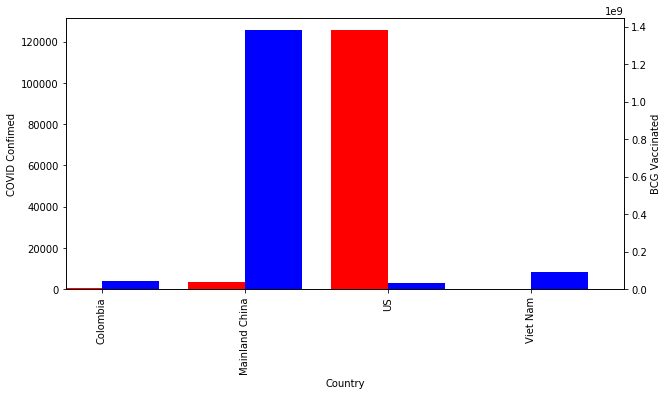

In [9]:
#Plot the graph
fig = plt.figure() 
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.4
merge_df.COVID_Confirmed.plot(kind='bar', color='red', figsize=(10, 5), ax=ax, width=width,position=1)
merge_df.bcg_vaccinated.plot(kind='bar', color='blue', figsize=(10, 5), ax=ax2, width=width, position=0)
ax.set_ylabel('COVID Confimed')
ax2.set_ylabel('BCG Vaccinated')
plt.show()


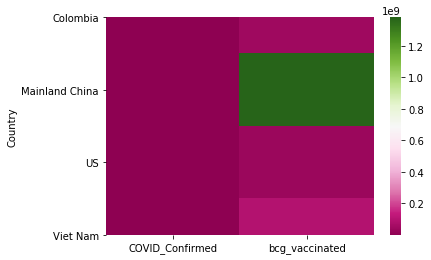

In [10]:
import seaborn as sns
%matplotlib inline



sns.heatmap(merge_df, cmap="PiYG")
plt.savefig("Heatmap.png")
plt.show()
